# <font color=purple><center> O caixeiro que prefere cidades ímpares
    
### <font color=violet><center>Maria Clara Macêdo Lelis
    
    
<font color=green> Neste caderno enfrentamos o problema do caixeiro viajante com um porém, o nosso caixeiro prefere cidades ímpares e por isso deve passarpor todas as cidades que satisfazem esse critério antes de seguir para as outras. Nesse caderno utilizamos as funções presentes no script `fera_10`, o código é melhor explicado ao final do caderno. 

In [1]:
from fera_10 import *

0:523.72
20:411.50
40:411.50
60:411.50
80:411.50
100:411.50
120:411.50
140:411.50
160:411.50
180:411.50

Melhorcaminho: [0, 12, 4, 8, 2, 10, 6, 1, 9, 7, 11, 3, 5, 0]
Distânciatotal: 411.5


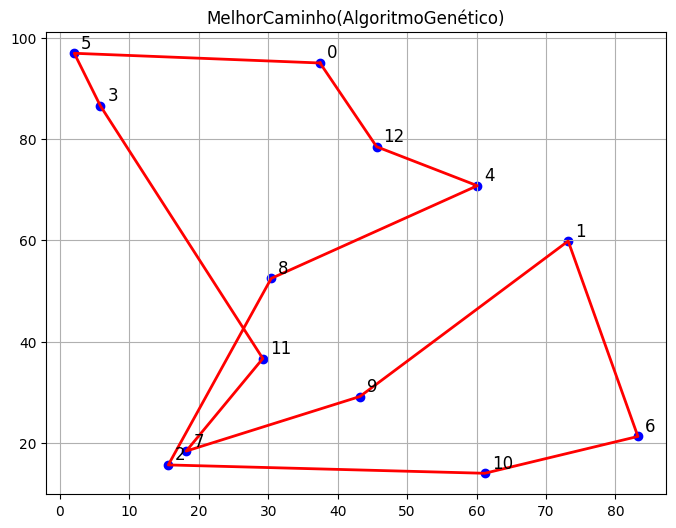

In [9]:
n=13
np.random.seed(42)
random.seed(42)

coords=np.random.rand(n,2)*100
cidades=list(range(n))
impares=[i for i in cidades if i%2==1]
pares=[i for i in cidades if i%2==0 and i!=0]

pop_size=100
generations=200
population=[create_individual(impares,pares) for _ in range(pop_size)]

top_n=20
for gen in range(generations):
    population.sort(key=lambda ind:distancia(ind,coords))
    best=population[:top_n]
    new_population=best.copy()
    while len(new_population)<pop_size:
        p1,p2=random.sample(best,2)
        child=crossover(p1,p2,impares)
        child=mutacao(child,impares)
        new_population.append(child)
    population=new_population
    if gen%20==0:
        print(f"{gen}:{distancia(population[0],coords):.2f}")

melhor_caminho=population[0]
menor_dist=distancia(melhor_caminho,coords)
print("\nMelhorcaminho:",melhor_caminho)
print("Distânciatotal:",round(menor_dist,2))

plt.figure(figsize=(8,6))
x,y=coords[:,0],coords[:,1]
plt.scatter(x,y,c='blue')
for i,(xi,yi) in enumerate(coords):
    plt.text(xi+1,yi+1,str(i),fontsize=12)

path_coords=coords[best_path]
plt.plot(path_coords[:,0],path_coords[:,1],c='red',linestyle='-',linewidth=2)
plt.title("MelhorCaminho(AlgoritmoGenético)")
plt.grid(True)
plt.show()


### <font color=green> Explicação do código
    
<font color=green>Primeiro geramos o numero de cidades a serem visitadas com coordenadas aleatórias e separamos os índices em pares (exceto o 0) e ímpares. A população inicial é criada com possíveis caminhos válidos, onde certos critérios de ordem entre pares e ímpares são respeitados, usando a função create_individual(). Cada indivíduo da população representa um caminho possível visitando todas as cidades.
Ao longo de 200 gerações, o algoritmo evolui os caminhos tentando encontrar o de menor distância total. Em cada geração, ele ordena os caminhos da população com base na distância total percorrida, mantém os 20 melhores (elitismo) e usa esses para gerar novos caminhos por cruzamento (crossover) e mutação (mutacao). Esse processo de seleção, reprodução e mutação vai repetindo até que todas as gerações sejam completadas. A cada 20 gerações, ele imprime a menor distância encontrada até aquele ponto.
No final, o melhor caminho encontrado é exibido, junto com a distância total percorrida. O gráfico gerado mostra as cidades no plano, com seus índices, e traça em vermelho o melhor caminho usando as coordenadas das cidades.